<a href="https://colab.research.google.com/github/nadsu077/Top.in.CompXIII/blob/main/T%C3%B3picos_Especiais_em_Computa%C3%A7%C3%A3o_XIII_Lista_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE***
***TÓPICOS ESPECIAIS EM COMPUTAÇÃO XIII - Lista 3***

***Docente:*** Antônio Carlos Gay Thomé

***Discentes:*** Nadson Ângelo e Rosângela D'Ávilla

In [ ]:
# Importando ferramentas do Scikit-Learn a serem utilizados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn import svm

# Importando demais funções a serem utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Rápida Análise descritiva dos dados

In [ ]:
# Conjunto Iris

iris = pd.read_excel("https://github.com/nadsu077/Top.in.CompXIII/raw/main/iris-art.xlsx")

# Conjunto Diabetes

diabetes = pd.read_excel("https://github.com/nadsu077/Top.in.CompXIII/raw/main/Diabetes_Original.xlsx")

#
print("Conjuntos de dados Iris:\n",iris.describe())

print("\n\nConjunto de dados Diabetes:\n",diabetes.describe())


Conjuntos de dados Iris:
                V1          V2          V3          V4          V5
count  510.000000  510.000000  510.000000  510.000000  510.000000
mean     5.866980    3.061706    3.780078    1.194647    2.000000
std      0.829076    0.416542    1.772013    0.752948    0.817298
min      4.300000    2.000000    1.000000    0.100000    1.000000
25%      5.102500    2.802500    1.530000    0.290000    1.000000
50%      5.800000    3.000000    4.410000    1.340000    2.000000
75%      6.440000    3.317500    5.100000    1.800000    3.000000
max      7.900000    4.400000    6.900000    2.500000    3.000000


Conjunto de dados Diabetes:
          Gravidez     Glicose     Pressão  ...  Genealogia       Idade  Diagnóstico
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000   768.000000
mean     3.845052  120.894531   69.105469  ...    0.472266   33.240885     1.348958
std      3.369578   31.972618   19.355807  ...    0.332348   11.760232     0.476951
min      0.00

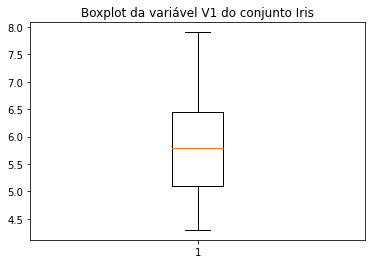

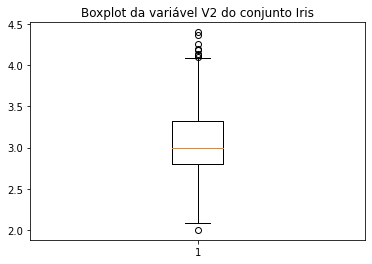

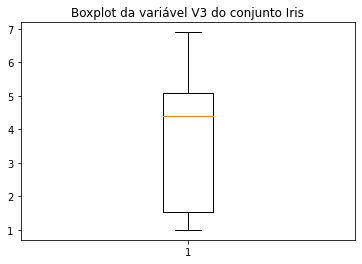

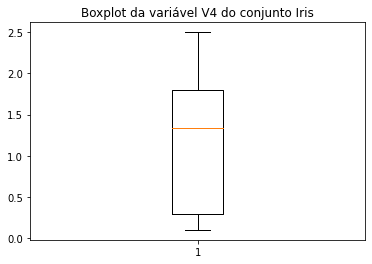

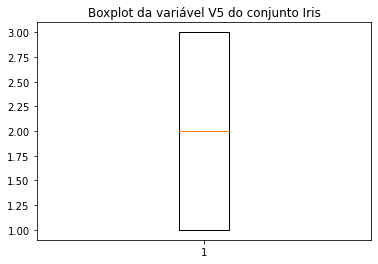

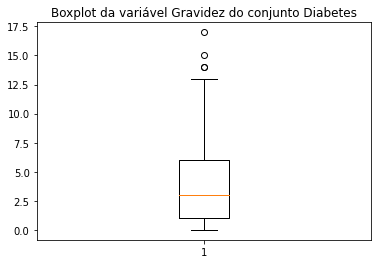

Existem  111  dados com valores iguais a zero na variável  Gravidez 




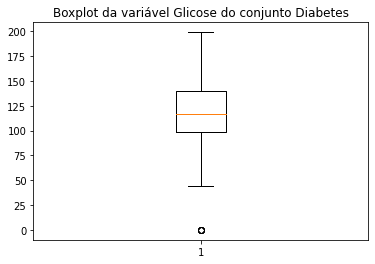

Existem  5  dados com valores iguais a zero na variável  Glicose 




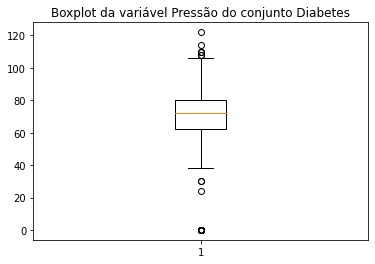

Existem  35  dados com valores iguais a zero na variável  Pressão 




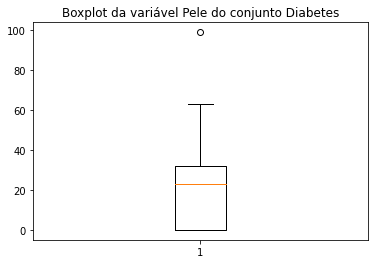

Existem  227  dados com valores iguais a zero na variável  Pele 




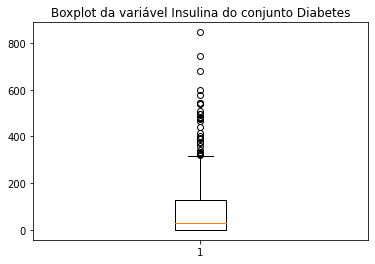

Existem  374  dados com valores iguais a zero na variável  Insulina 




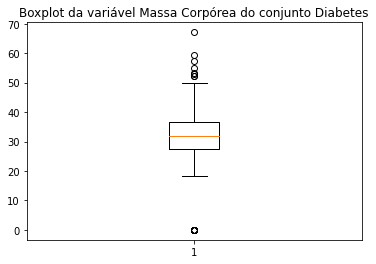

Existem  11  dados com valores iguais a zero na variável  Massa Corpórea 




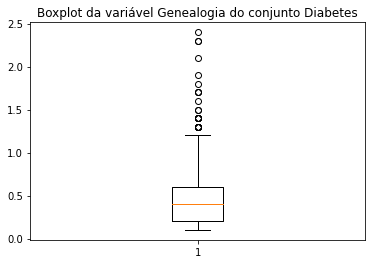

Existem  0  dados com valores iguais a zero na variável  Genealogia 




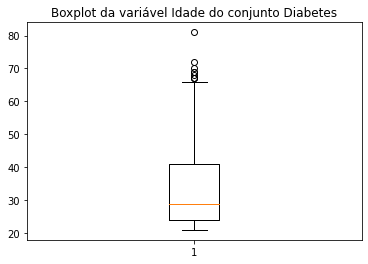

Existem  0  dados com valores iguais a zero na variável  Idade 




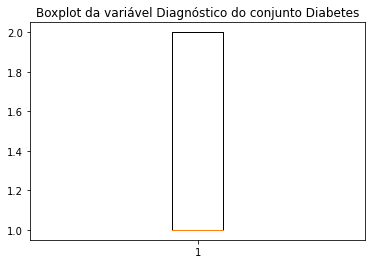

Existem  0  dados com valores iguais a zero na variável  Diagnóstico 




In [ ]:
# Boxplot das variáveis do conjunto Diabetes
for i in iris.columns :
    plt.boxplot(iris[i])
    plt.title("Boxplot da variável " + i + " do conjunto Iris")
    plt.show()

# Boxplot das variáveis do conjunto Diabetes
for i in diabetes.columns :
    plt.boxplot(diabetes[i])
    plt.title("Boxplot da variável " + i + " do conjunto Diabetes")
    plt.show()
    print("Existem ",len(diabetes.loc[diabetes[i]==0]), " dados com valores iguais a zero na variável ", i,"\n\n")



#Conjunto Iris
O box plot das variáveis do conjunto *`Iris`* não apresentam outliers que sejam destoantes do conjunto de dados de sua respectiva variável, sendo então não necessário o tratamento dessas variáveis.

#Conjunto Diabetes
O conjunto *`Diabetes`* apresenta dados não coerentes (iguais a zero) nas variáveis *`Glicose (5 ocorrências), Pressão (35 ocorrências), Pele (227 ocorrências), Insulina (374 ocorrências) e Massa Copórea (11 ocorrências)`*.
Dessa forma, é aconselhável realizar algum método (média móvel, regressão linear múltipla, etc) para corrigir esse problema nas varáveis que pode ser da falta de registro desses dados. Porém iremos assumir que esses registros estejam corretos e condizem com a realidade.

In [ ]:
# Retirando os dados que contenham zeros nas variáveis citadas, pois o modelo de rede neural apresentou erro quadrático médio negativamente considerável
diabetes1 = diabetes[(diabetes["Glicose"] != 0) & (diabetes["Pressão"] != 0) & (diabetes["Pele"] != 0) & (diabetes["Insulina"] != 0) & (diabetes["Massa Corpórea"] != 0)]

#**Primeira Parte - Rede Neural**
Será feito a classificação dos dados do conjunto *`Iris`* e do conjunto *`Diabetes`* utilizando o Multilayer Perceptron.

In [ ]:
# Iris
Xi = iris.iloc[:,:4]
Yi = iris[iris.columns[4]]

# Normalizando o conjunto de dados Iris
escala1 = StandardScaler()
escala1.fit(Xi)

Xi_norm = escala1.transform(Xi)

# Diabetes
Xd = diabetes1.iloc[:,:8]
Yd = diabetes1[diabetes1.columns[8]]

# Normalizando o conjunto de dados Diabetes
escala2 = StandardScaler()
escala2.fit(Xd)

Xd_norm = escala2.transform(Xd)

In [ ]:
# Bases de Treino e Teste
# Iris
Xi_norm_train, Xi_norm_test, Yi_train, Yi_test = train_test_split(Xi_norm, Yi, test_size = 0.3)

# Bases de Treino e Teste
# Diabetes
Xd_norm_train, Xd_norm_test, Yd_train, Yd_test = train_test_split(Xd_norm, Yd, test_size = 0.3)

print("Conjunto de dados Iris:\n"
    "Dimensão dos dados de treino:\n", "Xi = ",Xi_norm_train.shape, "Yi = ",Yi_train.shape,
    "\nDimensão dos dados de teste:\n", "Xi = ",Xi_norm_test.shape, "Yi = ",Yi_test.shape,
    "\n\n\nConjunto de dados Diabetes:\n",
    "Dimensão dos dados de treino:\n", "Xd = ",Xd_norm_train.shape, "Yd = ",Yd_train.shape,
    "\nDimensão dos dados de teste:\n", "Xd = ",Xd_norm_test.shape, "Yd = ",Yd_test.shape)

Conjunto de dados Iris:
Dimensão dos dados de treino:
 Xi =  (357, 4) Yi =  (357,) 
Dimensão dos dados de teste:
 Xi =  (153, 4) Yi =  (153,) 


Conjunto de dados Diabetes:
 Dimensão dos dados de treino:
 Xd =  (274, 8) Yd =  (274,) 
Dimensão dos dados de teste:
 Xd =  (118, 8) Yd =  (118,)


In [ ]:
# Rede Neural para o conjunto Iris
rnai = MLPClassifier(hidden_layer_sizes=(10,5,3), max_iter=2000, tol=0.000001, learning_rate_init=0.1, solver="sgd", activation="logistic", verbose = 2)

# Modelo
rnai.fit(Xi_norm_train, Yi_train)

Iteration 1, loss = 1.11497638
Iteration 2, loss = 1.10582773
Iteration 3, loss = 1.09942293
Iteration 4, loss = 1.09783108
Iteration 5, loss = 1.09980360
Iteration 6, loss = 1.10109841
Iteration 7, loss = 1.10116302
Iteration 8, loss = 1.10031397
Iteration 9, loss = 1.09902276
Iteration 10, loss = 1.09835384
Iteration 11, loss = 1.09866059
Iteration 12, loss = 1.09880472
Iteration 13, loss = 1.09890295
Iteration 14, loss = 1.09907581
Iteration 15, loss = 1.09898239
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5, 3), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=1e-06, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
# Rede Neural para o conjunto Diabetes
rnad = MLPClassifier(hidden_layer_sizes=(5,3), max_iter=3000, tol=0.000001, learning_rate_init=0.1, solver="sgd", activation="logistic", verbose = 2, learning_rate = "adaptive")

# Modelo
rnad.fit(Xd_norm_train, Yd_train)

Iteration 1, loss = 0.69899887
Iteration 2, loss = 0.67788220
Iteration 3, loss = 0.66104660
Iteration 4, loss = 0.65175666
Iteration 5, loss = 0.65045320
Iteration 6, loss = 0.65338051
Iteration 7, loss = 0.65348493
Iteration 8, loss = 0.65238312
Iteration 9, loss = 0.65079358
Iteration 10, loss = 0.64985642
Iteration 11, loss = 0.64870808
Iteration 12, loss = 0.64846180
Iteration 13, loss = 0.64846833
Iteration 14, loss = 0.64815731
Iteration 15, loss = 0.64792143
Iteration 16, loss = 0.64768117
Iteration 17, loss = 0.64732444
Iteration 18, loss = 0.64701403
Iteration 19, loss = 0.64655174
Iteration 20, loss = 0.64614702
Iteration 21, loss = 0.64556711
Iteration 22, loss = 0.64573106
Iteration 23, loss = 0.64477409
Iteration 24, loss = 0.64417426
Iteration 25, loss = 0.64353892
Iteration 26, loss = 0.64295259
Iteration 27, loss = 0.64236010
Iteration 28, loss = 0.64155912
Iteration 29, loss = 0.64077258
Iteration 30, loss = 0.63991280
Iteration 31, loss = 0.63902273
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 3), learning_rate='adaptive',
              learning_rate_init=0.1, max_fun=15000, max_iter=3000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=1e-06, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
# Conjunto Iris
Yi_rna_predito = rnai.predict(Xi_norm_test)

# Conjunto Diabetes
Yd_rna_predito = rnad.predict(Xd_norm_test)

In [ ]:
# Conjunto Iris

# R² do modelo
r2_rnai = r2_score(Yi_test, Yi_rna_predito)

# Matriz de Confusão
cmi = confusion_matrix(Yi_test, Yi_rna_predito)

# Acurácia 
acci = accuracy_score(Yi_test, Yi_rna_predito)

# Precisão
preci = precision_score(Yi_test, Yi_rna_predito, average = "macro")

# Recall
reci = recall_score(Yi_test, Yi_rna_predito, average="macro")

print("RESULTADO DO CONJUNTO IRIS",
      "\nMatriz de Confusão = \n", cmi,
      "\nR² = ",r2_rnai,
      "\nAcurácia = ", acci,
      "\nPrecisão = ", preci,
      "\nRecall = ", reci)

RESULTADO DO CONJUNTO IRIS 
Matriz de Confusão = 
 [[49  0  0]
 [54  0  0]
 [50  0  0]] 
R² =  -1.5658259606496765 
Acurácia =  0.3202614379084967 
Precisão =  0.10675381263616557 
Recall =  0.3333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#O modelo de rede neural apresentou ótimo poder de generalização com R² superior a 90%. As demais métricas apresentaram resultados bastante satisfatórios com Acurácia, Precisão e Recall acima de 90%. Para o conjunto *`Iris`* o algoritmo de rede neural teve ótimos resultados.

In [ ]:
# Conjunto Diabetes

# R² do modelo
r2_rnad = r2_score(Yd_test, Yd_rna_predito)

# Matriz de Confusão
cmd = confusion_matrix(Yd_test, Yd_rna_predito)

# Acurácia 
accd = accuracy_score(Yd_test, Yd_rna_predito)

# Precisão
precd = precision_score(Yd_test, Yd_rna_predito, average = "macro")

# Recall
recd = recall_score(Yd_test, Yd_rna_predito, average="macro")

print("RESULTADO DO CONJUNTO DIABETES",
      "\nMatriz de Confusão = \n", cmd,
      "\nR² = ",r2_rnad,
      "\nAcurácia = ", accd,
      "\nPrecisão = ", precd,
      "\nRecall = ", recd)

RESULTADO DO CONJUNTO DIABETES 
Matriz de Confusão = 
 [[67 18]
 [12 21]] 
R² =  -0.26203208556149704 
Acurácia =  0.7457627118644068 
Precisão =  0.6932814021421616 
Recall =  0.7122994652406417


#Embora o R² tenha sido próximo a -0.05, as demais métricas tiveram bons resultados com valores para Acurácia, Precisão e Recall acima de 70%. Dessa forma, o modelo apresenta poder de generalização insignificante, mas demonstra boas métricas. Possa ser que utilizar mais dados ou realizar algum tratamento para os dados não utilizados melhore o resultado do modelo.

#**Segunda Parte - Support Vector Machine (SVM)**

In [ ]:
clf = svm.SVC() # Criando vetor de classificação por SVM

In [ ]:
# Modelando o conjunto Iris pelo SVM
clf.fit(Xi_norm_train, Yi_train)

Yi_SVM_predito = clf.predict(Xi_norm_test)

In [ ]:
# Conjunto Iris

# R² do modelo
r2_rnai = r2_score(Yi_test, Yi_SVM_predito)

# Matriz de Confusão
cmi = confusion_matrix(Yi_test, Yi_SVM_predito)

# Acurácia 
acci = accuracy_score(Yi_test, Yi_SVM_predito)

# Precisão
preci = precision_score(Yi_test, Yi_SVM_predito, average = "macro")

# Recall
reci = recall_score(Yi_test, Yi_SVM_predito, average="macro")

print("RESULTADO DO CONJUNTO IRIS",
      "\nMatriz de Confusão = \n", cmi,
      "\nR² = ",r2_rnai,
      "\nAcurácia = ", acci,
      "\nPrecisão = ", preci,
      "\nRecall = ", reci)

#O resultado do SVM para o conjunto Iris teve 100% de aproveitamento para todas as métricas e R² igual a 100%, ou seja, o modelo do SVM consegue diferenciar com exatidão as classes do conjunto Iris, possa ser que o modelo tenha sofrido Overtraining ou os dados estejam dispostos de forma que o modelo consiga distingui-los com precisão. Vale analisar minuciosamente o comportamento dos dados. 

In [ ]:
# Modelando o conjunto Diabetes pelo SVM
clf.fit(Xd_norm_train, Yd_train)

Yd_SVM_predito = clf.predict(Xd_norm_test)

In [ ]:
# Conjunto Diabetes

# R² do modelo
r2_rnad = r2_score(Yd_test, Yd_SVM_predito)

# Matriz de Confusão
cmd = confusion_matrix(Yd_test, Yd_SVM_predito)

# Acurácia 
accd = accuracy_score(Yd_test, Yd_SVM_predito)

# Precisão
precd = precision_score(Yd_test, Yd_SVM_predito, average = "macro")

# Recall
recd = recall_score(Yd_test, Yd_SVM_predito, average="macro")

print("RESULTADO DO CONJUNTO IRIS",
      "\nMatriz de Confusão = \n", cmd,
      "\nR² = ",r2_rnad,
      "\nAcurácia = ", accd,
      "\nPrecisão = ", precd,
      "\nRecall = ", recd)

# Assim como ocorreu com a rede neural, o SVM teve poder de generalização muito baixo, próximo de zero, porém as métricas ficaram acima de 70% com os dados utilizados. Dessa forma, tal como a interpretação do resultado na rede neural, vale olhar para os dados que foram retirados e gerar novos dados a fim de aumentar o conjunto e observar se o resultado se modifica ou não.

#**Conclusão**


#Conjunto Iris:
Os resultados obtidos na Rede Neural foi muito satisfatório para o conjunto analisado, porém ao observar o Support Vector Machine (SVM) o modelo pode ter sofrido com problemas de *overtraining*, vale observar as métricas utilizadas afim de de obter um modelo que não decore os resultador para que ele tenha poder de generalização semelhante ao da Rede Neural (MLP).

#Conjunto Diabetes:
Os resultados encontrados para o conjunto Diabetes não foram satisfatórios, pois o modelo não atingiu bons números quanto ao poder de generalizar os resultados, porém as métricas de acurária, precisão e recall tiveram resultados satisfatórios. Vale ressaltar que foram retirados os dados que tinham incongruência com os atributos afim de deixar o *dataset* com resultados válidos. Para melhorar os resultados possa ser que gerando novos dados artificialmente melhore o ajuste dos modelos para o conjunto utilizado.
